In [1]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [2]:
sentence = "The big brown dog barked at the mailman."
tokens = nltk.word_tokenize(sentence)
tagged_tokens = nltk.pos_tag(tokens)
print(tagged_tokens)

[('The', 'DT'), ('big', 'JJ'), ('brown', 'NN'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('mailman', 'NN'), ('.', '.')]


In [3]:
tree = nltk.chunk.ne_chunk(tagged_tokens)
print(tree)

(S
  The/DT
  big/JJ
  brown/NN
  dog/NN
  barked/VBD
  at/IN
  the/DT
  mailman/NN
  ./.)


In [4]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.5 MB/s eta 0:00:00


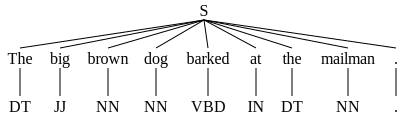

In [5]:
from IPython.display import display
display(tree)

In [6]:
!python -m spacy download it_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 113.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
import spacy
nlp = spacy.load("it_core_news_sm")

doc = nlp("Il grande cane nero ha abbaiato al postino.")
pos = [token.pos_ for token in doc]
print(pos)
print(list(zip([t.text for t in doc], pos)))


['DET', 'ADJ', 'NOUN', 'ADJ', 'AUX', 'VERB', 'ADP', 'NOUN', 'PUNCT']
[('Il', 'DET'), ('grande', 'ADJ'), ('cane', 'NOUN'), ('nero', 'ADJ'), ('ha', 'AUX'), ('abbaiato', 'VERB'), ('al', 'ADP'), ('postino', 'NOUN'), ('.', 'PUNCT')]


In [8]:
from spacy import displacy
displacy.serve(doc, style="dep")

/usr/local/lib/python3.12/dist-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [29]:
# Load the Penn Treebank corpus via nltk (it's a 10% percent of the original corpus)
nltk.download('treebank')
corpus = nltk.corpus.treebank.tagged_sents()

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [30]:
print(len(corpus))
# https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
idx = 10
print(nltk.corpus.treebank.sents()[idx])
print(' '.join(nltk.corpus.treebank.sents()[idx]))
print(corpus[idx])

3914
['Neither', 'Lorillard', 'nor', 'the', 'researchers', 'who', '*T*-3', 'studied', 'the', 'workers', 'were', 'aware', 'of', 'any', 'research', 'on', 'smokers', 'of', 'the', 'Kent', 'cigarettes', '.']
Neither Lorillard nor the researchers who *T*-3 studied the workers were aware of any research on smokers of the Kent cigarettes .
[('Neither', 'DT'), ('Lorillard', 'NNP'), ('nor', 'CC'), ('the', 'DT'), ('researchers', 'NNS'), ('who', 'WP'), ('*T*-3', '-NONE-'), ('studied', 'VBD'), ('the', 'DT'), ('workers', 'NNS'), ('were', 'VBD'), ('aware', 'JJ'), ('of', 'IN'), ('any', 'DT'), ('research', 'NN'), ('on', 'IN'), ('smokers', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('Kent', 'NNP'), ('cigarettes', 'NNS'), ('.', '.')]


In [31]:
# get the statistics of the labels in the dataset
labels_stats = {}
for sent in corpus:
  for word in sent:
    if word[1] not in labels_stats:
      labels_stats[word[1]] = 1
    else:
      labels_stats[word[1]] += 1
print(labels_stats)

{'NNP': 9410, ',': 4886, 'CD': 3546, 'NNS': 6047, 'JJ': 5834, 'MD': 927, 'VB': 2554, 'DT': 8165, 'NN': 13166, 'IN': 9857, '.': 3874, 'VBZ': 2125, 'VBG': 1460, 'CC': 2265, 'VBD': 3043, 'VBN': 2134, '-NONE-': 6592, 'RB': 2822, 'TO': 2179, 'PRP': 1716, 'RBR': 136, 'WDT': 445, 'VBP': 1321, 'RP': 216, 'PRP$': 766, 'JJS': 182, 'POS': 824, '``': 712, 'EX': 88, "''": 694, 'WP': 241, ':': 563, 'JJR': 381, 'WRB': 178, '$': 724, 'NNPS': 244, 'WP$': 14, '-LRB-': 120, '-RRB-': 126, 'PDT': 27, 'RBS': 35, 'FW': 4, 'UH': 3, 'SYM': 1, 'LS': 13, '#': 16}


In [32]:
len(labels_stats)

for x in labels_stats:
    print(x)

NNP
,
CD
NNS
JJ
MD
VB
DT
NN
IN
.
VBZ
VBG
CC
VBD
VBN
-NONE-
RB
TO
PRP
RBR
WDT
VBP
RP
PRP$
JJS
POS
``
EX
''
WP
:
JJR
WRB
$
NNPS
WP$
-LRB-
-RRB-
PDT
RBS
FW
UH
SYM
LS
#


<BarContainer object of 46 artists>

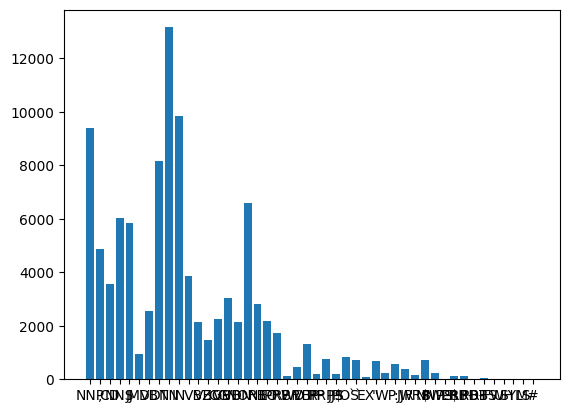

In [33]:
import matplotlib.pyplot as plt

plt.bar(*zip(*labels_stats.items()))

In [34]:
sorted_labels_stats = sorted(labels_stats.items(), key=lambda item: item[1], reverse=True)
print(dict(sorted_labels_stats))

{'NN': 13166, 'IN': 9857, 'NNP': 9410, 'DT': 8165, '-NONE-': 6592, 'NNS': 6047, 'JJ': 5834, ',': 4886, '.': 3874, 'CD': 3546, 'VBD': 3043, 'RB': 2822, 'VB': 2554, 'CC': 2265, 'TO': 2179, 'VBN': 2134, 'VBZ': 2125, 'PRP': 1716, 'VBG': 1460, 'VBP': 1321, 'MD': 927, 'POS': 824, 'PRP$': 766, '$': 724, '``': 712, "''": 694, ':': 563, 'WDT': 445, 'JJR': 381, 'NNPS': 244, 'WP': 241, 'RP': 216, 'JJS': 182, 'WRB': 178, 'RBR': 136, '-RRB-': 126, '-LRB-': 120, 'EX': 88, 'RBS': 35, 'PDT': 27, '#': 16, 'WP$': 14, 'LS': 13, 'FW': 4, 'UH': 3, 'SYM': 1}


<BarContainer object of 46 artists>

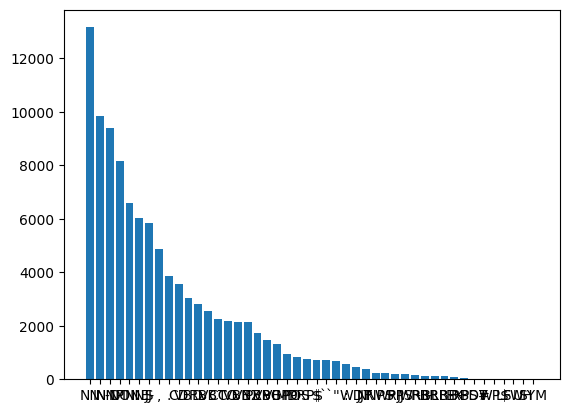

In [35]:
import matplotlib.pyplot as plt

plt.bar(*zip(*dict(sorted_labels_stats).items()))

In [36]:
from sklearn.model_selection import train_test_split

(x_train, x_test) = train_test_split(corpus, test_size=0.2, random_state=17)

In [37]:
x_train[0]

[('He', 'PRP'),
 ('adds', 'VBZ'),
 ('that', 'IN'),
 ('his', 'PRP$'),
 ('shares', 'NNS'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('company', 'NN'),
 ('savings', 'NN'),
 ('plan', 'NN'),
 ('are', 'VBP'),
 ('invested', 'VBN'),
 ('*-1', '-NONE-'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('mutual', 'JJ'),
 ('fund', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('volatility', 'NN'),
 (',', ','),
 ('on', 'IN'),
 ('a', 'DT'),
 ('given', 'VBN'),
 ('day', 'NN'),
 (',', ','),
 ('may', 'MD'),
 ('hurt', 'VB'),
 ('the', 'DT'),
 ('fund', 'NN'),
 ('.', '.')]

**Hidden Markov Model**

In [38]:
hmm_tagger = nltk.tag.HiddenMarkovModelTrainer().train_supervised(x_train)
hmm_tagger.test(x_test)

/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:333: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:335: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:331: RuntimeWarning: overflow encountered in cast
  P[i] = self._priors.logprob(si)
/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:363: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


accuracy over 20619 tokens: 39.10


**Conditional Random Field**

In [39]:
!pip install sklearn-crfsuite

import sklearn_crfsuite
from sklearn_crfsuite import metrics

In [40]:
# Extract features for each sentence in the corpus
# here a feature is simply the word itself
def get_features(corpus):
  X = []
  y = []
  for sentence in corpus:
    X_sentence = []
    y_sentence = []
    for word in sentence:
      X_sentence.append(word[0])
      y_sentence.append(word[1])
    X.append(X_sentence)
    y.append(y_sentence)
  return X, y

X_train, y_train = get_features(x_train)
X_test, y_test = get_features(x_test)

In [21]:
print(X_train[0])
print(y_train[0])

['He', 'adds', 'that', 'his', 'shares', 'in', 'a', 'company', 'savings', 'plan', 'are', 'invested', '*-1', 'in', 'a', 'mutual', 'fund', ',', 'and', 'volatility', ',', 'on', 'a', 'given', 'day', ',', 'may', 'hurt', 'the', 'fund', '.']
['PRP', 'VBZ', 'IN', 'PRP$', 'NNS', 'IN', 'DT', 'NN', 'NN', 'NN', 'VBP', 'VBN', '-NONE-', 'IN', 'DT', 'JJ', 'NN', ',', 'CC', 'NN', ',', 'IN', 'DT', 'VBN', 'NN', ',', 'MD', 'VB', 'DT', 'NN', '.']


In [22]:
# Train a CRF model on the training data
# L-BFGS training algorithm with Elastic Net (L1 + L2) regularization.
crf = sklearn_crfsuite.CRF(
	algorithm='lbfgs',
	c1=0.1,
	c2=0.1,
	max_iterations=100,
	all_possible_transitions=True
)

# Wrap in a try-except due to bugs known in sklearn and crfsuite
try:
  crf.fit(X_train, y_train)
except AttributeError:
    pass

In [23]:
# Make predictions on the test data and evaluate the performance
y_pred = crf.predict(X_test)

print('Accuracy on the test set = {}'.format(
    metrics.flat_accuracy_score(y_test, y_pred)))
print('F1 score on the test set = {}'.format(
    metrics.flat_f1_score(y_test, y_pred, average='weighted')))

from itertools import chain
from sklearn.metrics import classification_report

f_y_test = list(chain.from_iterable(y_test))
f_pred_y = list(chain.from_iterable(y_pred))

print('Test set classification report: \n\n{}'.format(
    classification_report(f_y_test, f_pred_y)))

Accuracy on the test set = 0.790775498326786
F1 score on the test set = 0.7867521358350033
Test set classification report: 

              precision    recall  f1-score   support

           #       1.00      1.00      1.00         3
           $       1.00      1.00      1.00       177
          ''       0.99      0.99      0.99       134
           ,       1.00      1.00      1.00      1072
       -LRB-       1.00      1.00      1.00        27
      -NONE-       1.00      1.00      1.00      1377
       -RRB-       1.00      0.96      0.98        27
           .       0.99      1.00      1.00       777
           :       1.00      0.94      0.97       137
          CC       0.91      0.91      0.91       500
          CD       0.95      0.88      0.92       781
          DT       0.82      0.90      0.86      1638
          EX       1.00      0.76      0.87        17
          FW       0.00      0.00      0.00         2
          IN       0.79      0.83      0.81      1974
          

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
# Define a function to extract features for each word in a sentence
# here we consider different features, other features may be added or removed
# try to change them and check model's performances

# my solution

def word_features(sentence, i):
	word = sentence[i][0]
	features = {
		'word': word,
		'is_first': i == 0, #if the word is a first word
		'is_last': i == len(sentence) - 1, #if the word is a last word
		'is_capitalized': word[0].upper() == word[0],
		'is_all_caps': word.upper() == word,	 #word is in uppercase
		'is_all_lower': word.lower() == word,	 #word is in lowercase
		#prefix of the word
		'prefix-1': word[0],
		'prefix-2': word[:2],
		'prefix-3': word[:3],
		#suffix of the word
		'suffix-1': word[-1],
		'suffix-2': word[-2:],
		'suffix-3': word[-3:],
		#extracting previous word
		'prev_word': '' if i == 0 else sentence[i-1][0],
		#extracting next word
		'next_word': '' if i == len(sentence)-1 else sentence[i+1][0],
		'has_hyphen': '-' in word, #if word has hypen
		'is_numeric': word.isdigit(), #if word is in numeric
		'capitals_inside': word[1:].lower() != word[1:]
	}
	return features

In [26]:
# Extract features for each sentence in the corpus
def get_features(corpus):
  X = []
  y = []
  for sentence in corpus:
    X_sentence = []
    y_sentence = []
    for i in range(len(sentence)):
      X_sentence.append(word_features(sentence, i))
      y_sentence.append(sentence[i][1])
    X.append(X_sentence)
    y.append(y_sentence)
  return X, y

X_train, y_train = get_features(x_train)
X_test, y_test = get_features(x_test)

In [27]:
print(X_train[0])
print(y_train[0])

[{'word': 'He', 'subsequent-1': 'adds', 'suc_pos-1': 'VBZ', 'subsequent-2': 'that', 'suc_pos-2': 'IN'}, {'word': 'adds', 'subsequent-1': 'that', 'suc_pos-1': 'IN', 'subsequent-2': 'his', 'suc_pos-2': 'PRP$', 'subprec-1': 'He', 'prec_pos-1': 'PRP'}, {'word': 'that', 'subsequent-1': 'his', 'suc_pos-1': 'PRP$', 'subsequent-2': 'shares', 'suc_pos-2': 'NNS', 'subprec-1': 'adds', 'prec_pos-1': 'VBZ', 'subprec-2': 'He', 'prec_pos-2': 'PRP'}, {'word': 'his', 'subsequent-1': 'shares', 'suc_pos-1': 'NNS', 'subsequent-2': 'in', 'suc_pos-2': 'IN', 'subprec-1': 'that', 'prec_pos-1': 'IN', 'subprec-2': 'adds', 'prec_pos-2': 'VBZ'}, {'word': 'shares', 'subsequent-1': 'in', 'suc_pos-1': 'IN', 'subsequent-2': 'a', 'suc_pos-2': 'DT', 'subprec-1': 'his', 'prec_pos-1': 'PRP$', 'subprec-2': 'that', 'prec_pos-2': 'IN'}, {'word': 'in', 'subsequent-1': 'a', 'suc_pos-1': 'DT', 'subsequent-2': 'company', 'suc_pos-2': 'NN', 'subprec-1': 'shares', 'prec_pos-1': 'NNS', 'subprec-2': 'his', 'prec_pos-2': 'PRP$'}, {'

In [28]:
# try to change hyperparamenters

# Train a CRF model on the training data
crf = sklearn_crfsuite.CRF(
	algorithm='lbfgs',
	c1=0.1,
	c2=0.1,
	max_iterations=100,
	all_possible_transitions=True
)

try:
  crf.fit(X_train, y_train)
except AttributeError:
    pass

# Make predictions on the test data and evaluate the performance
y_pred = crf.predict(X_test)

print('Accuracy on the test set = {}'.format(metrics.flat_accuracy_score(y_test, y_pred)))
print('F1 score on the test set = {}'.format(metrics.flat_f1_score(y_test, y_pred, average='weighted')))

f_y_test = list(chain.from_iterable(y_test))
f_pred_y = list(chain.from_iterable(y_pred))

print('Test set classification report: \n\n{}'.format(classification_report(f_y_test, f_pred_y)))

Accuracy on the test set = 0.9374848440758524
F1 score on the test set = 0.9370118169927542
Test set classification report: 

              precision    recall  f1-score   support

           #       1.00      1.00      1.00         3
           $       1.00      1.00      1.00       177
          ''       1.00      1.00      1.00       134
           ,       1.00      1.00      1.00      1072
       -LRB-       1.00      1.00      1.00        27
      -NONE-       1.00      0.99      0.99      1377
       -RRB-       1.00      1.00      1.00        27
           .       1.00      1.00      1.00       777
           :       1.00      1.00      1.00       137
          CC       1.00      0.98      0.99       500
          CD       0.98      0.91      0.95       781
          DT       0.99      0.99      0.99      1638
          EX       1.00      1.00      1.00        17
          FW       0.00      0.00      0.00         2
          IN       0.97      0.99      0.98      1974
         

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# ripetere gli step con l'italiano
# https://github.com/iresiragusa/NLP/blob/main/datasets/POS_italian.txt